In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [7]:
# Load and preprocess data
df = pd.read_csv("financials.csv")  # Update the path if needed
df = df.dropna()

In [8]:
# Define financial risk based on debt & profit margin
def classify_risk(row):
    if row['Earnings/Share'] < 1 or row['Price/Earnings'] > 40 or row['Dividend Yield'] < 0.01:
        return 'High'
    elif row['Earnings/Share'] < 3 or row['Price/Earnings'] > 25:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification rule
df['Risk'] = df.apply(classify_risk, axis=1)

# Encode the Risk labels
le = LabelEncoder()
df['Risk_Label'] = le.fit_transform(df['Risk'])

In [11]:
# Prepare features (exclude target and price)
X = df.drop(columns=['Price', 'Risk', 'Risk_Label'], errors='ignore')

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

y = df['Risk_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔹 Random Forest Classification Report:

              precision    recall  f1-score   support

        High       1.00      0.93      0.96        29
         Low       1.00      1.00      1.00        32
      Medium       0.95      1.00      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



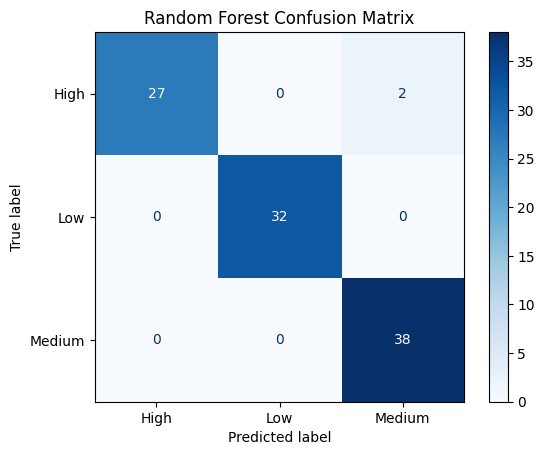

In [12]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("🔹 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:53:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Classification Report:

              precision    recall  f1-score   support

        High       1.00      0.90      0.95        29
         Low       1.00      1.00      1.00        32
      Medium       0.93      1.00      0.96        38

    accuracy                           0.97        99
   macro avg       0.98      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



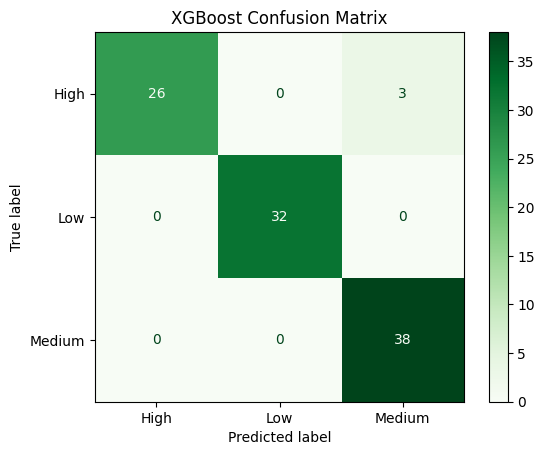

In [13]:
# XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("🔹 XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, display_labels=le.classes_, cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()
